<a href="https://colab.research.google.com/github/alexc6h6/Classification-Model/blob/master/plusar_stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
! ls '/content/drive/My Drive/pulsar_stars'

pulsar_stars.csv


In [0]:
data = pd.read_csv('/content/drive/My Drive/pulsar_stars/pulsar_stars.csv')

In [79]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [80]:
data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

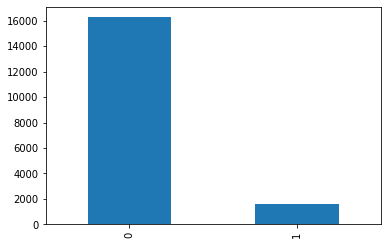

In [81]:
data['target_class'].value_counts().plot.bar()


In [0]:
#data[' Mean of the integrated profile'] = np.square(data[' Mean of the integrated profile'])
data[' Standard deviation of the integrated profile'] = np.log(data[' Standard deviation of the integrated profile'])
data[' Standard deviation of the DM-SNR curve'] = np.log(data[' Standard deviation of the DM-SNR curve'])

In [0]:
data.loc[data[' Excess kurtosis of the integrated profile'] > 2, ' Excess kurtosis of the integrated profile'] = data[' Excess kurtosis of the integrated profile'].mean()
data.loc[data[' Skewness of the integrated profile'] > 5, ' Skewness of the integrated profile'] = data[' Skewness of the integrated profile'].mean()
data.loc[data[' Mean of the DM-SNR curve'] > 25, ' Mean of the DM-SNR curve'] = data[' Mean of the DM-SNR curve'].mean()
data.loc[data[' Excess kurtosis of the DM-SNR curve'] > 20, ' Excess kurtosis of the DM-SNR curve'] = data[' Excess kurtosis of the DM-SNR curve'].mean()
data.loc[data[' Skewness of the DM-SNR curve'] > 400, ' Skewness of the DM-SNR curve'] = data[' Skewness of the DM-SNR curve'].mean()

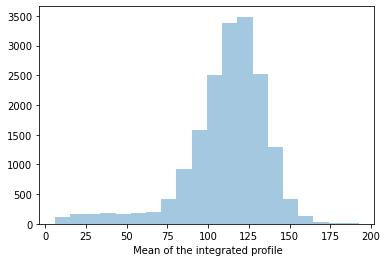

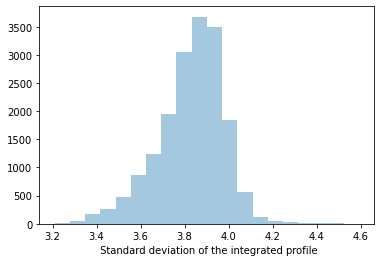

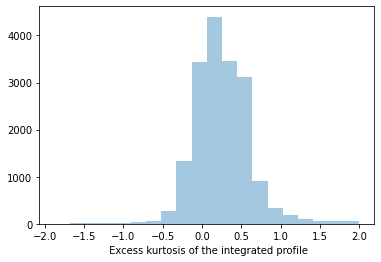

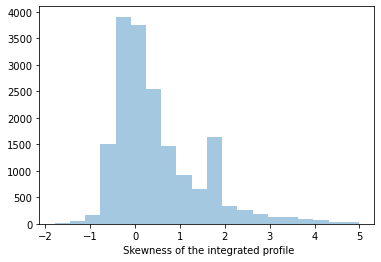

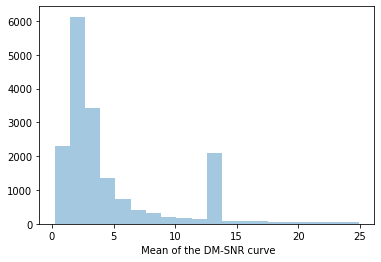

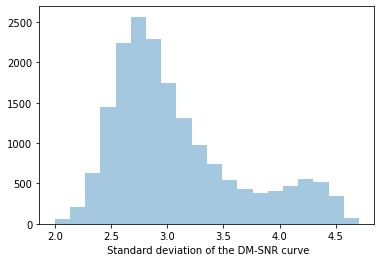

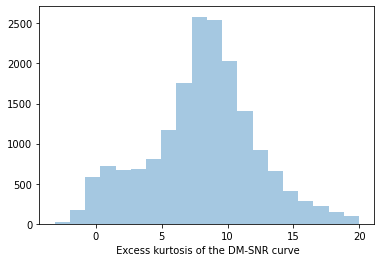

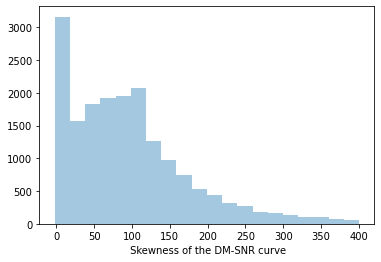

In [84]:
def num_feature(data, cols):
  for col in cols:
    sns.distplot(data[col], bins = 20, kde = False)
    plt.xlabel(col)
    plt.show()

cols_1 = [' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']

num_feature(data, cols_1)

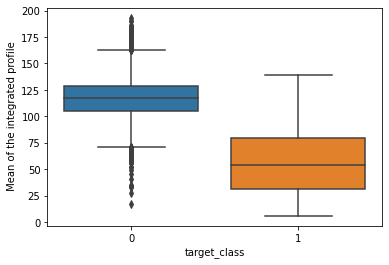

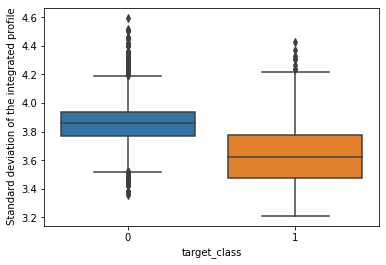

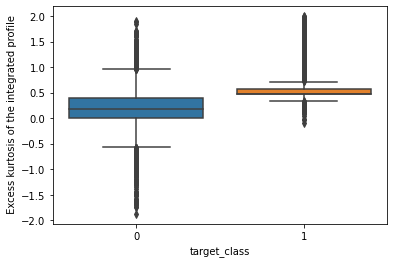

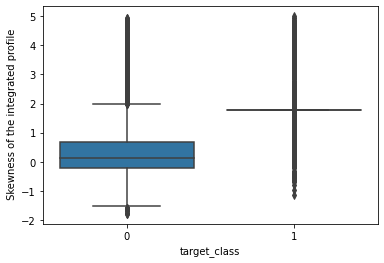

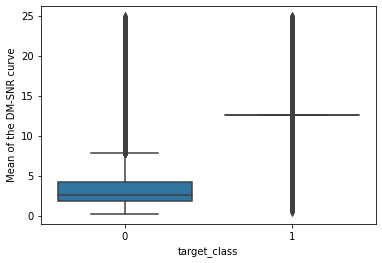

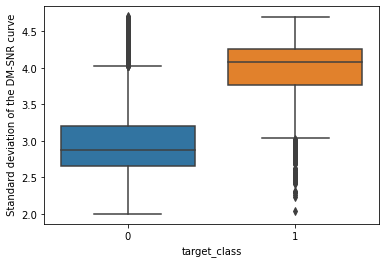

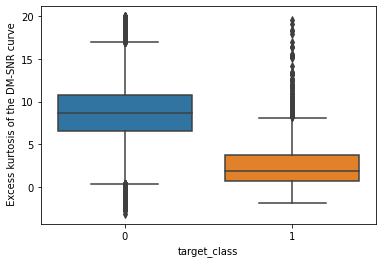

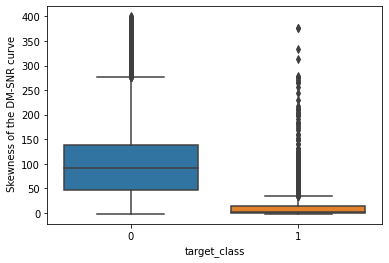

In [85]:
def rela_cat_num(data, cols, label):
  for col in cols:
    sns.boxplot(x = label, y = col, data = data)
    plt.ylabel(col)
    plt.show()

rela_cat_num(data, cols_1, data['target_class'])

In [0]:
#sns.pairplot(data, hue = 'target_class')
#plt.show()

In [87]:
label = data['target_class']
data.drop(columns = 'target_class', inplace = True)

print(label.shape)
print(data.shape)

(17898,)
(17898, 8)


In [0]:
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [0]:
sc = StandardScaler()
sc.fit(data)
data = sc.transform(data)

In [90]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2)
x_train.shape

(14318, 8)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau


In [0]:
model = Sequential()

model.add(Dense(units = 512, input_shape = (8, ), kernel_regularizer = regularizers.l2(0.2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

for i in range(0, 5):
  model.add(Dense(units = 256, kernel_regularizer = regularizers.l2(0.2)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

model.add(Dense(units =1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [93]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               4608      
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
activation_20 (Activation)   (None, 256)              

In [0]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 5, min_lr = 0.00001, verbose = 1, factor = 0.033)


Train on 11454 samples, validate on 2864 samples
Epoch 1/100
11454/11454 [==============================] - 1s 124us/step - loss: 152.1278 - acc: 0.9015 - val_loss: 61.8083 - val_acc: 0.8998
Epoch 2/100
11454/11454 [==============================] - 0s 39us/step - loss: 29.6424 - acc: 0.9666 - val_loss: 10.4168 - val_acc: 0.8998
Epoch 3/100
11454/11454 [==============================] - 0s 40us/step - loss: 4.6437 - acc: 0.9707 - val_loss: 1.7779 - val_acc: 0.8998
Epoch 4/100
11454/11454 [==============================] - 0s 39us/step - loss: 0.7335 - acc: 0.9718 - val_loss: 0.5863 - val_acc: 0.8998
Epoch 5/100
11454/11454 [==============================] - 0s 41us/step - loss: 0.2461 - acc: 0.9726 - val_loss: 0.4148 - val_acc: 0.8998
Epoch 6/100
11454/11454 [==============================] - 0s 39us/step - loss: 0.1846 - acc: 0.9739 - val_loss: 0.4248 - val_acc: 0.8998
Epoch 7/100
11454/11454 [==============================] - 0s 39us/step - loss: 0.1813 - acc: 0.9712 - val_loss: 0.40

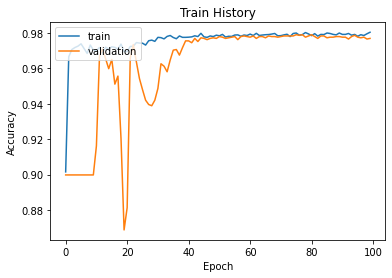

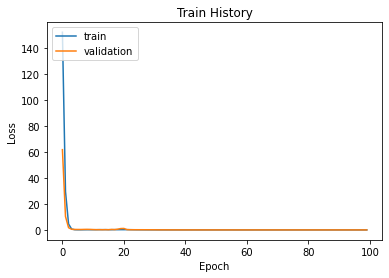

In [95]:
epochs = 100
batch = 256

history = model.fit(x_train, y_train, 
                    batch_size = batch, 
                    epochs = epochs, 
                    verbose = 1, 
                    callbacks = [reduce_lr], validation_split= 0.2)

def show_train_history_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

def show_train_history_loss(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

show_train_history_acc(history)
show_train_history_loss(history)

In [96]:
from sklearn.metrics import accuracy_score

prediction = model.predict(x_test).round(0)
score = accuracy_score(y_test, prediction)
print(score)
#print(y_test)
#print(prediction)

0.9768156424581006
